<a href="https://colab.research.google.com/github/AlexTovar31/Challenge_Telecom_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparacion de los datos

##Librerias utilizadas

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
telecomX2 = pd.read_csv('/content/telecomX2.csv')
telecomX2.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Daily
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [114]:
telecomX2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   object 
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 


In [115]:
telecomX2 = telecomX2.drop(['Charges_Daily'], axis=1)

In [116]:
print(telecomX2.shape)

(7256, 20)


In [117]:
print("\nEstadísticas Variables númericas:")
display(telecomX2.describe())


Estadísticas Variables númericas:


,SeniorCitizen,tenure,Charges_Monthly,Charges_Total
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


In [118]:
print("\nEstadísticas variables categóricas:")
display(telecomX2.describe(include='O'))


Estadísticas variables categóricas:


,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5387,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445


# Validacion valores faltantes

In [119]:
print(telecomX2.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64


In [120]:
for col in telecomX2.columns:
    print(f"\nColumna: {col}")
    print(telecomX2[col].unique())


Columna: Churn
['No' 'Yes']

Columna: gender
['Female' 'Male']

Columna: SeniorCitizen
[0 1]

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: OnlineBackup
['Yes' 'No' 'No internet service']

Columna: DeviceProtection
['No' 'Yes' 'No internet service']

Columna: TechSupport
['Yes' 'No' 'No internet service']

Columna: StreamingTV
['Yes' 'No' 'No internet service']

Columna: StreamingMovies
['No' 'Yes' 'No internet service']

Columna: Contract
['One year' 'Month-to-month' 'Two year']

Columna: PaperlessBilling
['Yes' 'No']

Col

# Limpieza y tratamiento de datos
Las columnas categóricas con “No internet service” o “No phone service” deben normalizarse.

Convertir Yes/No a 1/0.

Las columnas numéricas quedan tal cual.

Evitar colinealidad fuerte en variables dummy (drop_first=True en get_dummies).

# Unificacion de categorias redundantes

In [121]:
replace_no_service = ['No internet service', 'No phone service']
telecomX2.replace(replace_no_service, 'No', inplace=True)

In [122]:
binarias = ['Churn','gender','Partner','Dependents','PhoneService','PaperlessBilling',
            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies']
for col in binarias:
    telecomX2[col] = telecomX2[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

In [123]:
categoricas_multi = ['MultipleLines','InternetService','Contract','PaymentMethod']
telecomX2 = pd.get_dummies(telecomX2, columns=categoricas_multi, drop_first=True)

In [124]:
print(telecomX2.head())

   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       0              0        1           1       9             1   
1      0       1              0        0           0       9             1   
2      1       1              0        0           0       4             1   
3      1       1              1        1           0      13             1   
4      1       0              1        1           0       3             1   

   OnlineSecurity  OnlineBackup  DeviceProtection  ...  Charges_Monthly  \
0               0             1                 0  ...             65.6   
1               0             0                 0  ...             59.9   
2               0             0                 1  ...             73.9   
3               0             1                 1  ...             98.0   
4               0             0                 0  ...             83.9   

   Charges_Total  MultipleLines_Yes  InternetService_Fiber optic  \
0         59

#  Matriz de correlación y gráfico

In [125]:
corr_matrix = telecomX2.corr()

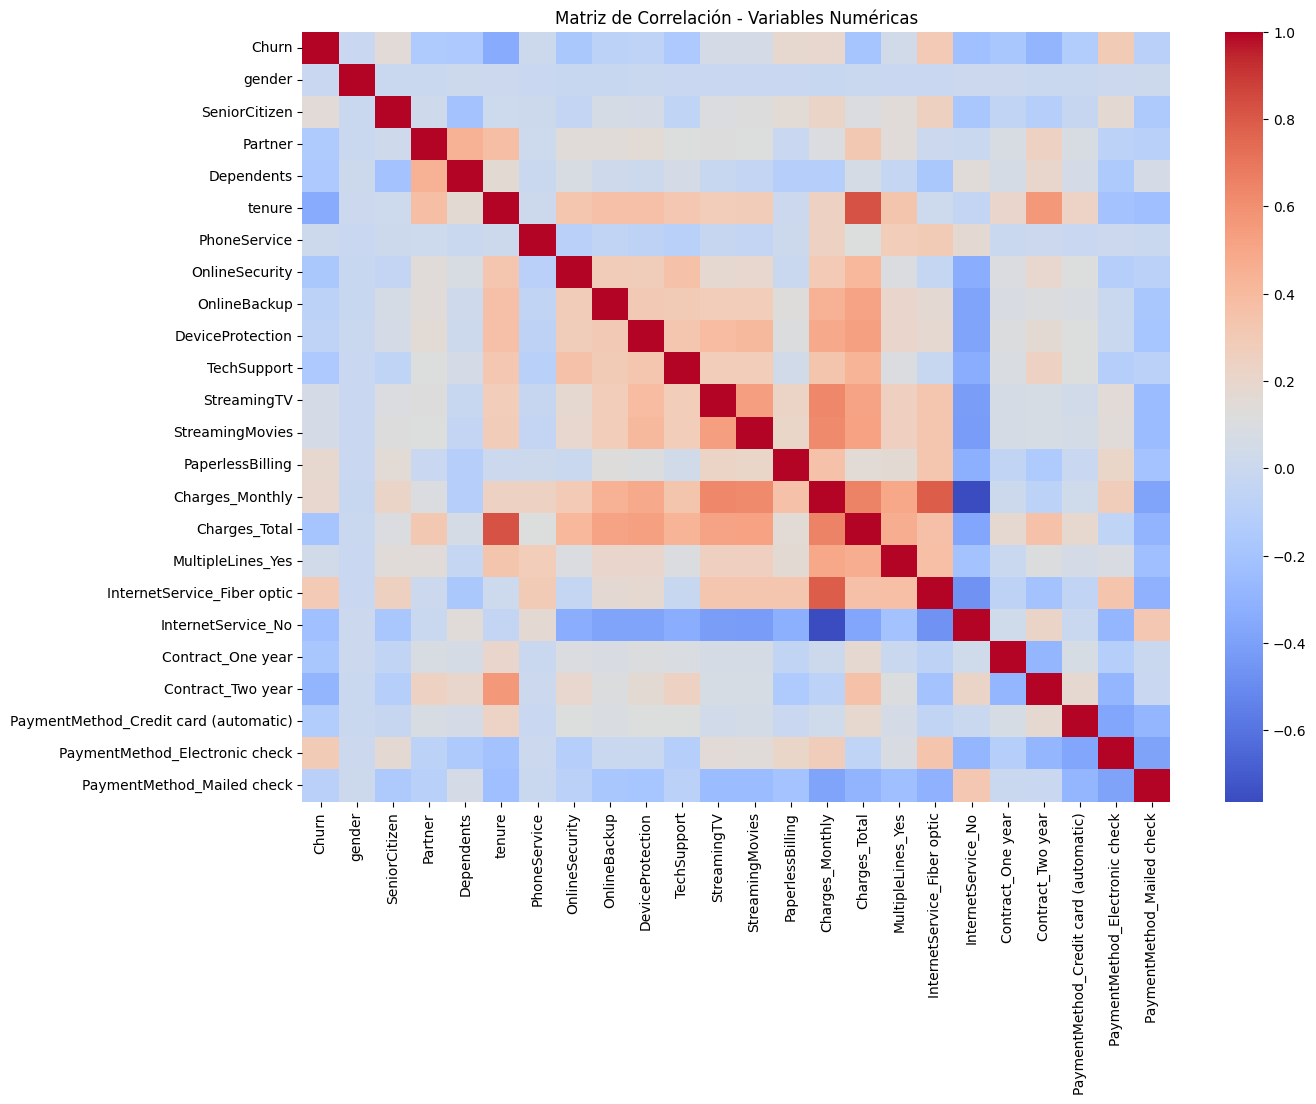

In [126]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

In [127]:
target_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(target_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.300416
PaymentMethod_Electronic check           0.294181
Charges_Monthly                          0.189393
PaperlessBilling                         0.186309
SeniorCitizen                            0.146400
StreamingTV                              0.062456
StreamingMovies                          0.060092
MultipleLines_Yes                        0.039277
PhoneService                             0.012337
gender                                  -0.009494
DeviceProtection                        -0.063479
OnlineBackup                            -0.080211
PaymentMethod_Mailed check              -0.089198
PaymentMethod_Credit card (automatic)   -0.131448
Partner                                 -0.148106
Dependents                              -0.160347
TechSupport                             -0.160476
OnlineSecurity                          -0.166865
Contract_One year                       -0.174340


# Selección de variables
Puedes eliminar variables:

Con correlación muy baja con Churn (ej. |coef| < 0.05)

Altamente colineales entre sí (ej. > 0.9)

In [128]:
low_corr = target_corr[abs(target_corr) < 0.05]
print("Variables con correlación baja con Churn:\n", low_corr)

Variables con correlación baja con Churn:
 MultipleLines_Yes    0.039277
PhoneService         0.012337
gender              -0.009494
Name: Churn, dtype: float64


In [133]:
telecomX2 = telecomX2.drop(['MultipleLines_Yes', 'PhoneService', 'gender' ], axis=1)

In [136]:
print(telecomX2.shape)

(7256, 21)


# Definir variable objetivo y features

In [140]:
if telecomX2['Churn'].dtype == 'O':
        telecomX2['Churn'] = telecomX2['Churn'].map({'Yes':1,'No':0}).astype(int)
y = telecomX2['Churn']
X = telecomX2.drop(columns=['Churn'])

print("X shape:", X.shape, "| y mean (tasa churn):", y.mean())

X shape: (7256, 20) | y mean (tasa churn): 0.25757993384785005


#Split estratificado y balanceo con SMOTE (solo en train)

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "| Test:", X_test.shape, "| churn train:", y_train.mean().round(3))


Train: (5804, 20) | Test: (1452, 20) | churn train: 0.258


# Balanceo

In [142]:
!pip -q install imblearn xgboost
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Balanceo OK. y_train antes:", y_train.value_counts().to_dict(),
      " | después:", y_train_bal.value_counts().to_dict())

Balanceo OK. y_train antes: {0: 4309, 1: 1495}  | después: {0: 4309, 1: 4309}


# Entrenar Decision Tree, Random Forest y XGBoost

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

dt = DecisionTreeClassifier(
    max_depth=None, min_samples_split=2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, n_jobs=-1, random_state=42
)

xgb = XGBClassifier(
    n_estimators=600, learning_rate=0.05, max_depth=5,
    subsample=0.9, colsample_bytree=0.9, eval_metric='logloss',
    random_state=42, n_jobs=-1
)

modelos = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_bal, y_train_bal)
print("Modelos entrenados.")

Modelos entrenados.


# Evaluación: métricas, matriz de confusión y ROC

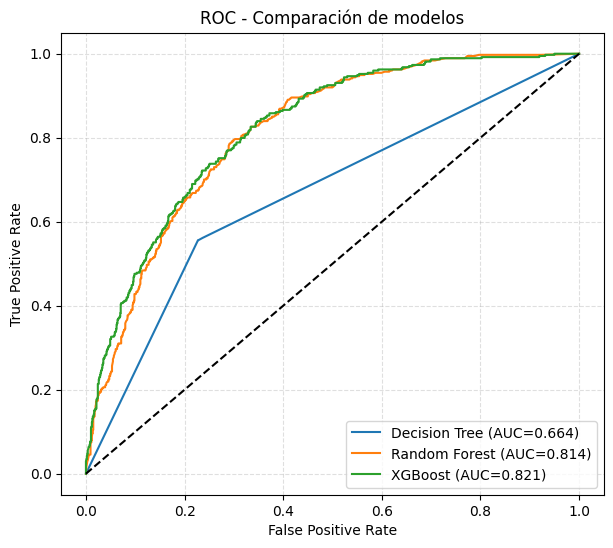

📊 Comparativa de modelos (ordenado por F1):


,Modelo,Accuracy,Precision,Recall,F1-score,ROC-AUC
2,XGBoost,0.774793,0.557740,0.606952,0.581306,0.821276
1,Random Forest,0.772039,0.555556,0.574866,0.565046,0.813798
0,Decision Tree,0.716253,0.458150,0.556150,0.502415,0.664443



===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1078
           1       0.46      0.56      0.50       374

    accuracy                           0.72      1452
   macro avg       0.65      0.66      0.65      1452
weighted avg       0.74      0.72      0.72      1452



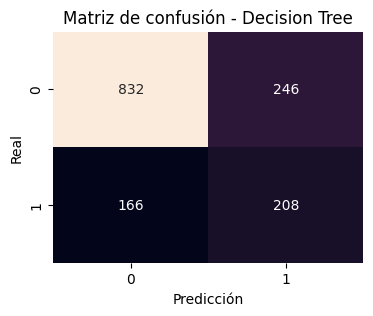


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1078
           1       0.56      0.57      0.57       374

    accuracy                           0.77      1452
   macro avg       0.70      0.71      0.71      1452
weighted avg       0.77      0.77      0.77      1452



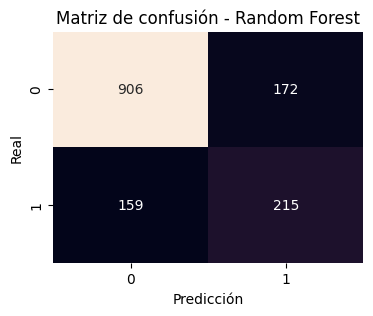


===== XGBoost =====
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1078
           1       0.56      0.61      0.58       374

    accuracy                           0.77      1452
   macro avg       0.71      0.72      0.71      1452
weighted avg       0.78      0.77      0.78      1452



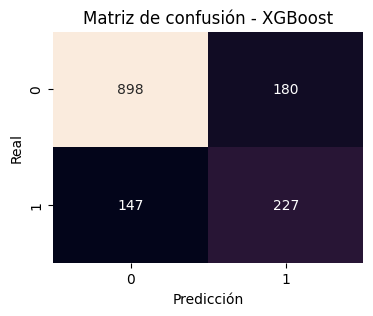

In [144]:
import numpy as np
import pandas as pd
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

resultados = []

plt.figure(figsize=(7,6))
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    resultados.append({"Modelo": nombre, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1, "ROC-AUC": auc})

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.3f})")

# Plot ROC combinado
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC - Comparación de modelos")
plt.legend()
plt.grid(True, ls='--', alpha=.4)
plt.show()

# Tabla comparativa ordenada por F1-score (puedes cambiar a 'ROC-AUC' según tu prioridad)
resultados_df = pd.DataFrame(resultados).sort_values(by="F1-score", ascending=False)
print("📊 Comparativa de modelos (ordenado por F1):")
display(resultados_df)

# Matrices de confusión y reportes
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    print(f"\n===== {nombre} =====")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción"); plt.ylabel("Real")
    plt.show()